In [3]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install opendatasets --quiet

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [5]:
import opendatasets as od 
dataset_url = 'https://www.kaggle.com/datasets/gauthamp10/google-playstore-apps'
od.download(dataset_url)

Skipping, found downloaded files in ".\google-playstore-apps" (use force=True to force download)


In [6]:
df = pd.read_csv('.\\google-playstore-apps\Google-Playstore.csv')

In [8]:
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


In [9]:
df.describe

<bound method NDFrame.describe of                                                   App Name  \
0                                                  Gakondo   
1                                      Ampere Battery Info   
2                                                   Vibook   
3        Smart City Trichy Public Service Vehicles 17UC...   
4                                                  GROW.me   
...                                                    ...   
2312939                                           大俠客—熱血歸來   
2312940                                         ORU Online   
2312941                                     Data Structure   
2312942                                        Devi Suktam   
2312943                       Biliyor Musun - Sonsuz Yarış   

                                       App Id       Category  Rating  \
0                         com.ishakwe.gakondo      Adventure     0.0   
1                  com.webserveis.batteryinfo          Tools     4.4   
2    

In [11]:
print(df.columns)


Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time'],
      dtype='object')


In [12]:
missing_values = df.isnull().sum().sort_values(ascending = False)
missing_values

Developer Website    760835
Privacy Policy       420953
Released              71053
Rating                22883
Rating Count          22883
Minimum Android        6530
Size                    196
Currency                135
Installs                107
Minimum Installs        107
Developer Id             33
Developer Email          31
App Name                  2
App Id                    0
Price                     0
Free                      0
Maximum Installs          0
Last Updated              0
Content Rating            0
Category                  0
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

Text(0.5, 1.0, 'Missing null values')

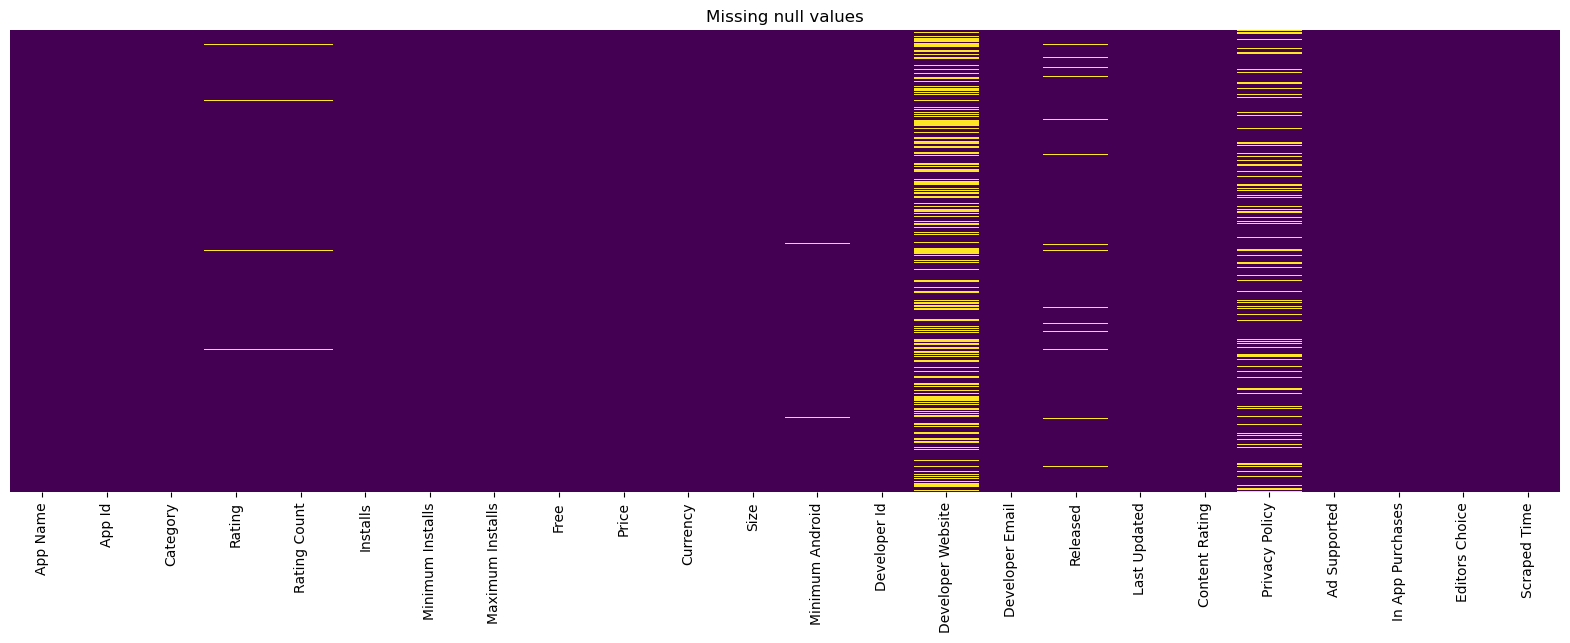

In [13]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,6)
sns.heatmap(df.isnull(),yticklabels = False, cbar = False , cmap = 'viridis')
plt.title("Missing null values")

In [14]:
df.dropna(subset = ['App Name','Size','Currency','Installs','Minimum Installs','Developer Id','Developer Email'], inplace = True)

In [15]:
df['Installs'].unique()

array(['10+', '5,000+', '50+', '100+', '1,000+', '500+', '50,000+',
       '10,000+', '1+', '500,000+', '100,000+', '5+', '10,000,000+',
       '1,000,000+', '5,000,000+', '0+', '100,000,000+', '50,000,000+',
       '1,000,000,000+', '500,000,000+', '5,000,000,000+',
       '10,000,000,000+'], dtype=object)

In [16]:
df['Installs'] = df['Installs'].str.split('+').str[0]  
df['Installs'].replace(',','', regex=True, inplace=True)
df['Installs'] = df['Installs'].astype(np.int64)  


In [17]:
df['Size'].unique()

array(['10M', '2.9M', '3.7M', ..., '405M', '3.2k', '512M'], dtype=object)

In [20]:
df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)

array(['10', '2.9', '3.7', ..., '405', '3.2k', '512'], dtype=object)

In [21]:
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)

ValueError: could not convert string to float: '1,018'

In [22]:
df['Size']=df['Size'].apply(lambda x: float(str(x).replace('G', ''))*1000 if 'G' in str(x) else x)

In [24]:
df['Free']


0          True
1          True
2          True
3          True
4          True
           ... 
2312939    True
2312940    True
2312941    True
2312942    True
2312943    True
Name: Free, Length: 2312548, dtype: bool

In [25]:
df['Type'] = np.where(df['Free'] == True,'Free','Paid')
df.drop(['Free'],axis=1, inplace= True)

In [27]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Mature 17+', 'Everyone 10+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [28]:
df["Content Rating"]=df["Content Rating"].replace("Unrated","Everyone")
df["Content Rating"]=df["Content Rating"].replace("Everyone 10+","Teen")
df["Content Rating"]=df["Content Rating"].replace("Mature 17+","Adults")
df["Content Rating"]=df["Content Rating"].replace("Adults only 18+","Adults")

In [30]:
df['Rating Count'].unique()


array([0.0000e+00, 6.4000e+01, 5.0000e+00, ..., 8.7553e+04, 7.5960e+04,
       7.8351e+04])

In [31]:
df['Rating Type'] = 'NoRatingProvided'
df.loc[(df['Rating Count'] > 0) & (df['Rating Count'] <= 10000.0),'RatingType'] = 'Less than 10K'
df.loc[(df['Rating Count'] > 10000) & (df['Rating Count'] <= 500000.0),'RatingType'] = 'Between 10K and 500K'
df.loc[(df['Rating Count'] > 500000) & (df['Rating Count'] <= 138557570.0),'RatingType'] = 'More than 500K'
df.RatingType.value_counts()

Less than 10K           1192801
Between 10K and 500K      35779
More than 500K             1665
Name: RatingType, dtype: int64

In [38]:
top_Category = df.Category.value_counts().reset_index().rename(columns={'Category':'Count','index':'Category'})

In [41]:
Category_installs = df.groupby(['Category'])[['Installs']].sum()

In [49]:
top_Category_installs = pd.merge(top_Category, Category_installs, on='Category')
top_Category_installs.head(5)


,Category,Count,Installs
0,Education,241068,5983815847
1,Music & Audio,154897,14239401798
2,Tools,143971,71440271217
3,Business,143749,5236661902
4,Entertainment,138261,17108397933


In [54]:
top_10_Categories_installs = top_Category_installs.head(10).sort_values(by = ['Installs'],ascending = False)

<AxesSubplot:title={'center':'Top 10 Installed Categories'}, xlabel='Category', ylabel='Installs'>

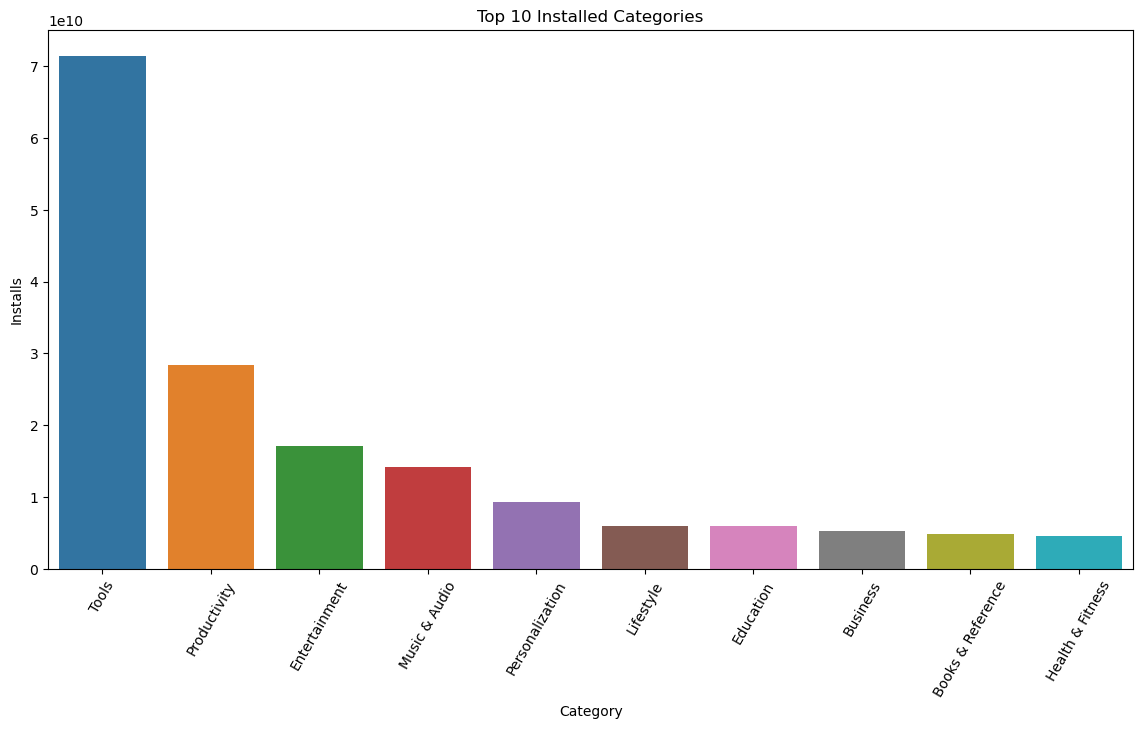

In [55]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=60)
plt.xlabel("Category")
plt.ylabel("Number of applications")
plt.title("Top 10 Installed Categories")
sns.barplot(x = top_10_Categories_installs.Category,y = top_10_Categories_installs.Installs)

<AxesSubplot:title={'center':'Top 10 Categories'}, xlabel='Category', ylabel='Count'>

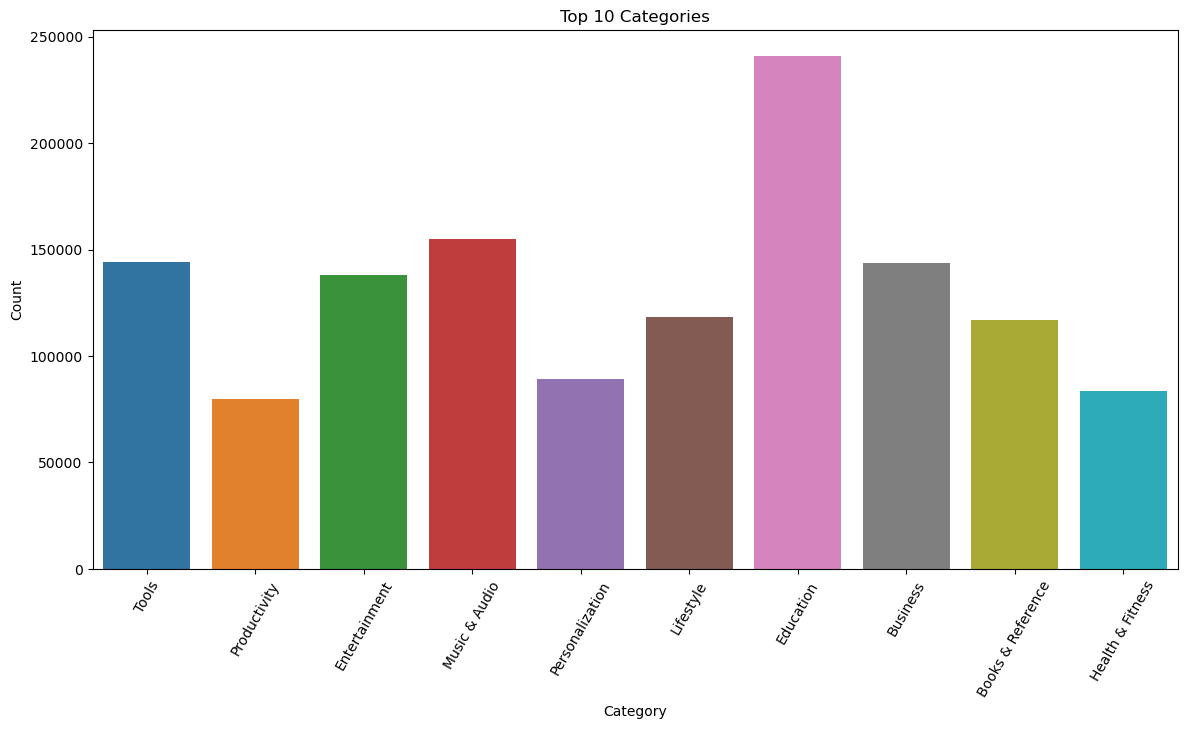

In [56]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=60)
plt.xlabel("Category")
plt.ylabel("Number of applications")
plt.title("Top 10 Categories")
sns.barplot(x = top_10_Categories_installs.Category, y = top_10_Categories_installs.Count)

<AxesSubplot:title={'center':'Total Categories and count of Applications in each category '}, xlabel='Category', ylabel='Count'>

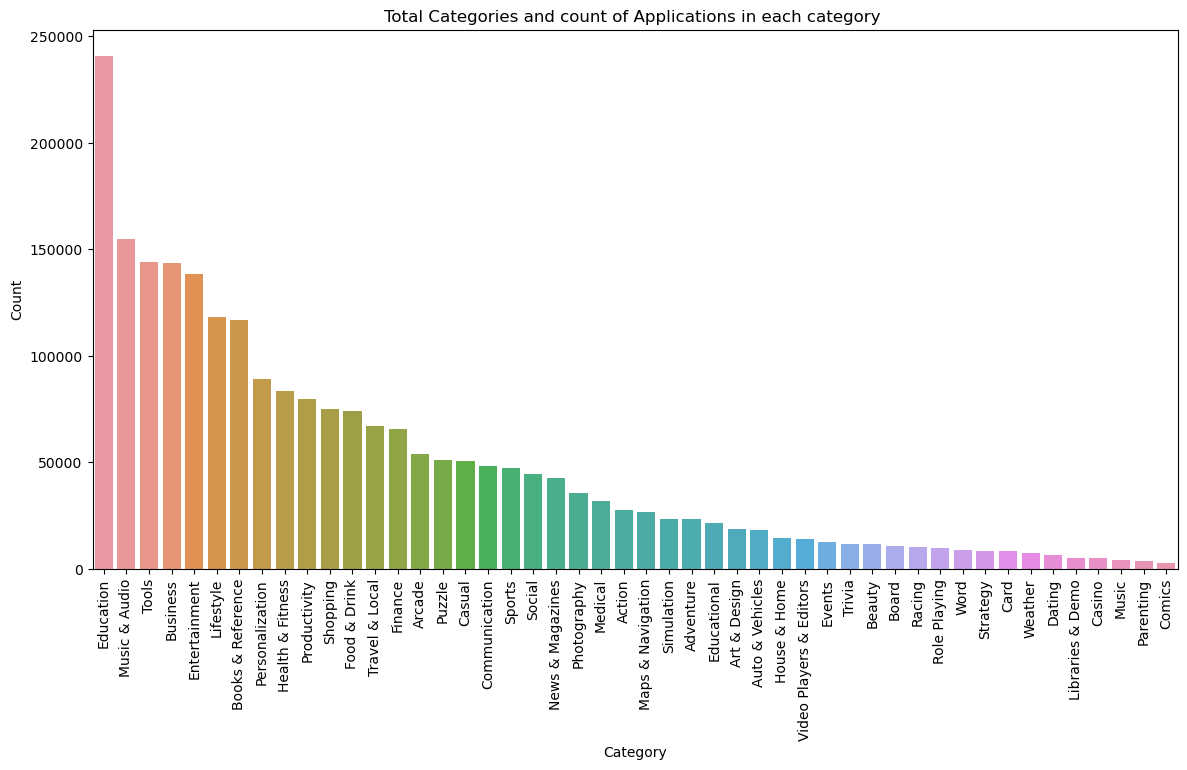

In [57]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Number of applications")
plt.title("Total Categories and count of Applications in each category ")
sns.barplot(x = top_Category_installs.Category, y = top_Category_installs.Count)

<AxesSubplot:title={'center':'Total Categories and Installation of Applications in each category '}, xlabel='Category', ylabel='Installs'>

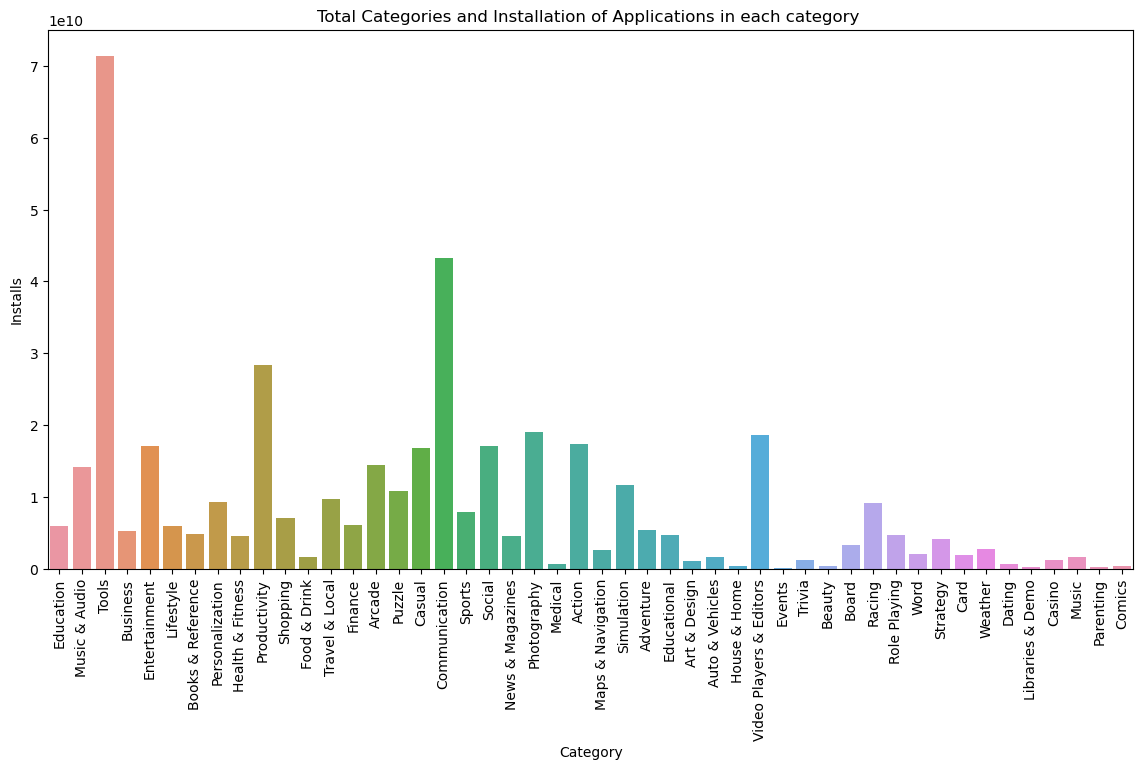

In [58]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Number of applications")
plt.title("Total Categories and Installation of Applications in each category ")
sns.barplot(x = top_Category_installs.Category,y = top_Category_installs.Installs)

<AxesSubplot:title={'center':'All Categories Rating '}, xlabel='Category', ylabel='Rating'>

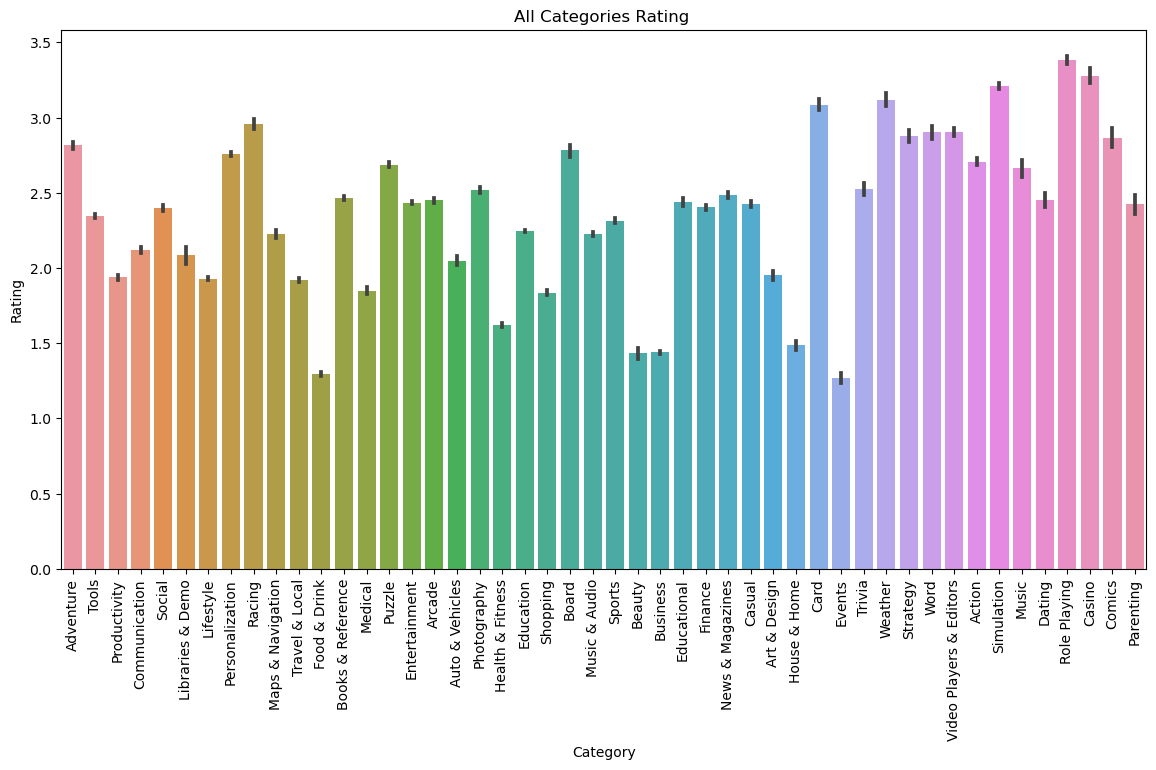

In [59]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Highest Rated Category")
plt.ylabel("Number of applications")
plt.title("All Categories Rating ")
sns.barplot(x = df.Category,y = df.Rating)

In [63]:
app_count = df.groupby(['Category','Type'])[['App Name']].count().reset_index().rename(columns={'App Name':'Count','index':'App Name'})
df_app_count = app_count.pivot('Category', 'Type', 'Count').fillna(0).reset_index()

Text(0.5, 1.0, 'Free and Paid Apps in Category')

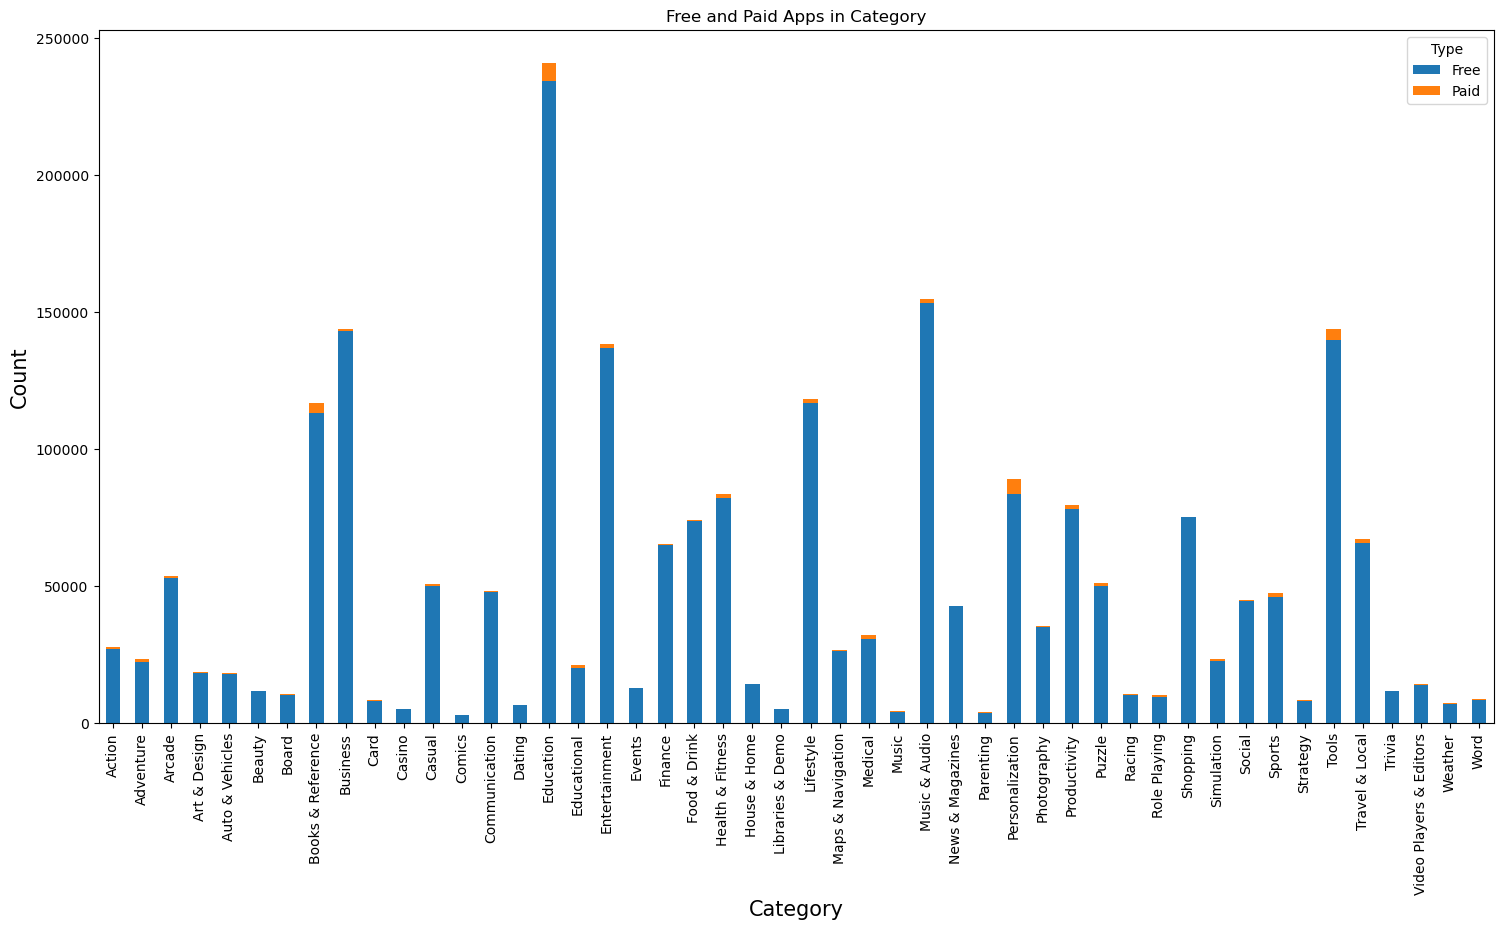

In [64]:
df_app_count.set_index('Category').plot(kind='bar', stacked=True, figsize=(18,9)) # try df_app_count.plot(kind='bar', stacked=True, figsize=(18,9))
plt.xlabel("Category", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Free and Paid Apps in Category")

In [65]:
categoty_type_installs = df.groupby(['Category','Type'])[['Installs']].sum().reset_index()
categoty_type_installs['log_Installs'] = np.log10(categoty_type_installs['Installs'])

<AxesSubplot:title={'center':'Number of installed Apps type wise according to Category'}, xlabel='Category', ylabel='log_Installs'>

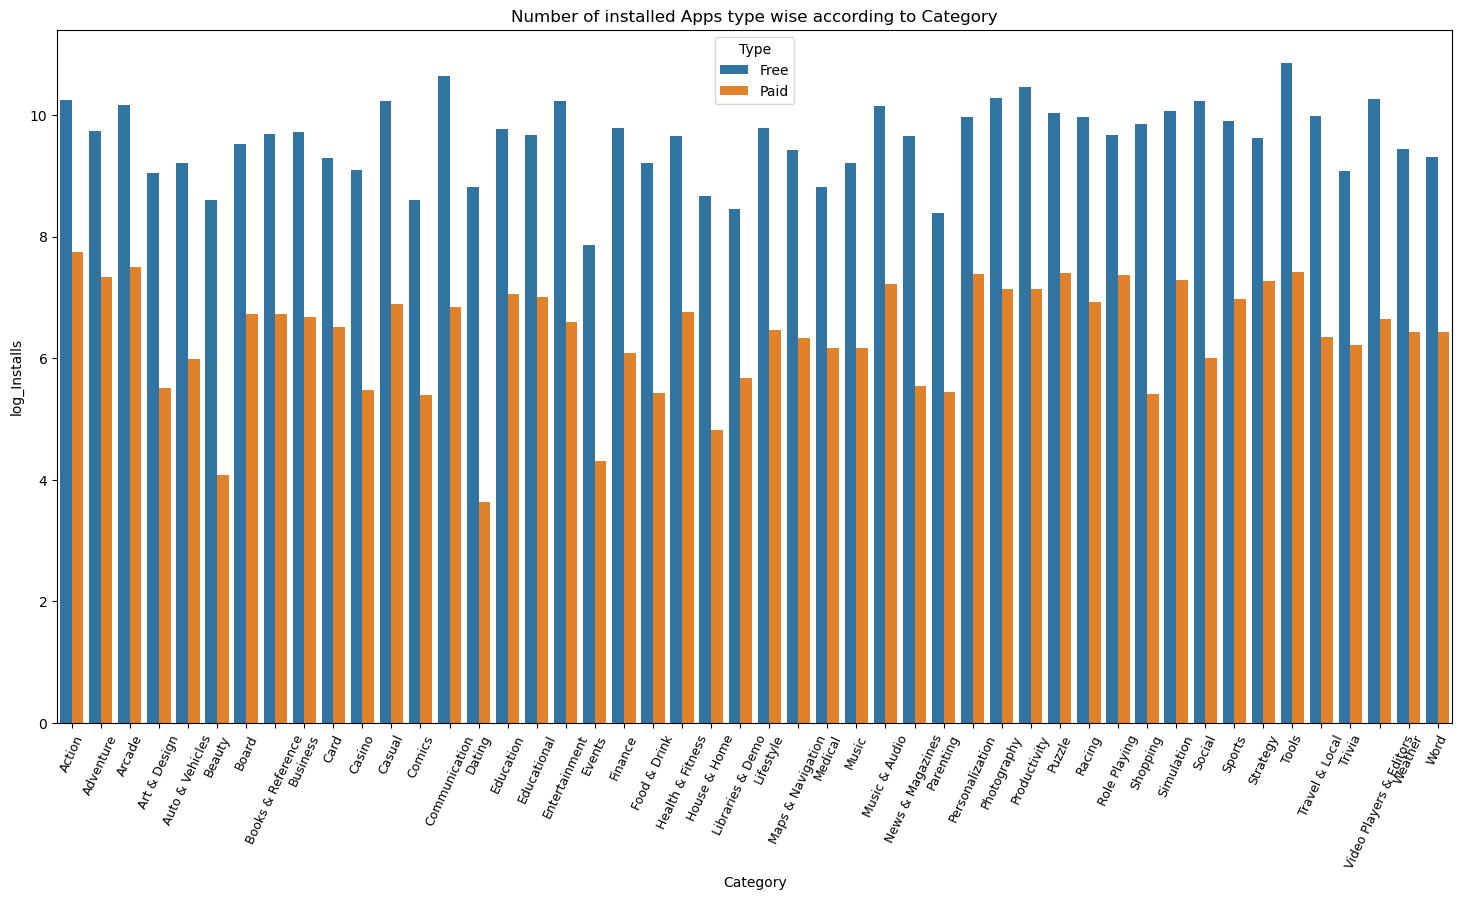

In [66]:
plt.figure(figsize=(18,9))
plt.xticks(rotation=65,fontsize=9)
plt.xlabel("Category")
plt.ylabel("Installs")
plt.title("Number of installed Apps type wise according to Category")
sns.barplot(x = 'Category', y = 'log_Installs', hue='Type', data=categoty_type_installs)

In [68]:
df.corr()


,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Price,Ad Supported,In App Purchases,Editors Choice
Rating,1.000000,0.013038,0.011215,0.011215,0.012615,-0.003674,0.160503,0.153824,0.019485
Rating Count,0.013038,1.000000,0.545281,0.545281,0.547571,-0.000411,0.005294,0.025737,0.137311
Installs,0.011215,0.545281,1.000000,1.000000,0.954037,-0.000461,0.002249,0.014178,0.059932
Minimum Installs,0.011215,0.545281,1.000000,1.000000,0.954037,-0.000461,0.002249,0.014178,0.059932
Maximum Installs,0.012615,0.547571,0.954037,0.954037,1.000000,-0.000515,0.002881,0.016100,0.064206
Price,-0.003674,-0.000411,-0.000461,-0.000461,-0.000515,1.000000,-0.034281,-0.002636,0.000503
Ad Supported,0.160503,0.005294,0.002249,0.002249,0.002881,-0.034281,1.000000,0.138304,0.005701
In App Purchases,0.153824,0.025737,0.014178,0.014178,0.016100,-0.002636,0.138304,1.000000,0.046078
Editors Choice,0.019485,0.137311,0.059932,0.059932,0.064206,0.000503,0.005701,0.046078,1.000000


<AxesSubplot:>

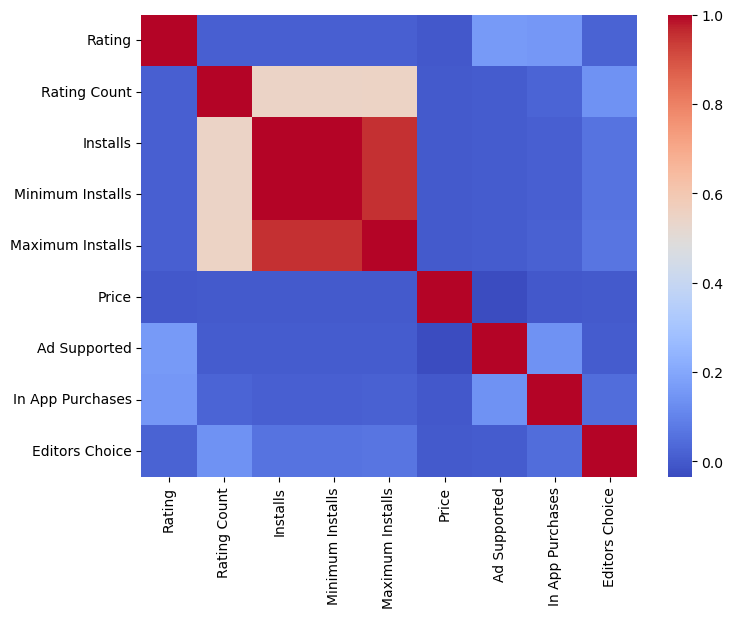

In [69]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),cbar= True, cmap='coolwarm')

In [70]:
paid_apps = df[(df.Type=='Paid') & (df.Installs >= 5000000)]
paid_apps = paid_apps.groupby('App Name')['Rating'].max().sort_values(ascending = False)

<AxesSubplot:title={'center':'Top 5 Paid Rated Apps'}, xlabel='Rating', ylabel='App Name'>

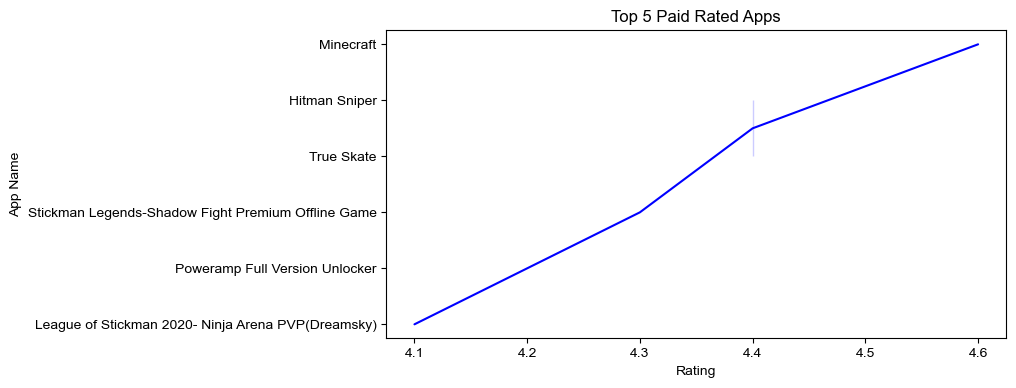

In [71]:
plt.figure(figsize=(8,4))
plt.xlabel("Rating")
sns.set_theme(style="whitegrid")
plt.title("Top 5 Paid Rated Apps")
sns.lineplot(x=paid_apps.values,y=paid_apps.index,color='Blue')

In [72]:
free_apps = df[(df.Type=='Free') & (df.Installs >= 5000000)]
free_apps = free_apps.groupby('App Name')['Rating'].max().sort_values(ascending = False)
free_apps = free_apps.head(5)

<AxesSubplot:title={'center':'Top 5 Free Rated Apps'}, xlabel='Rating', ylabel='App Name'>

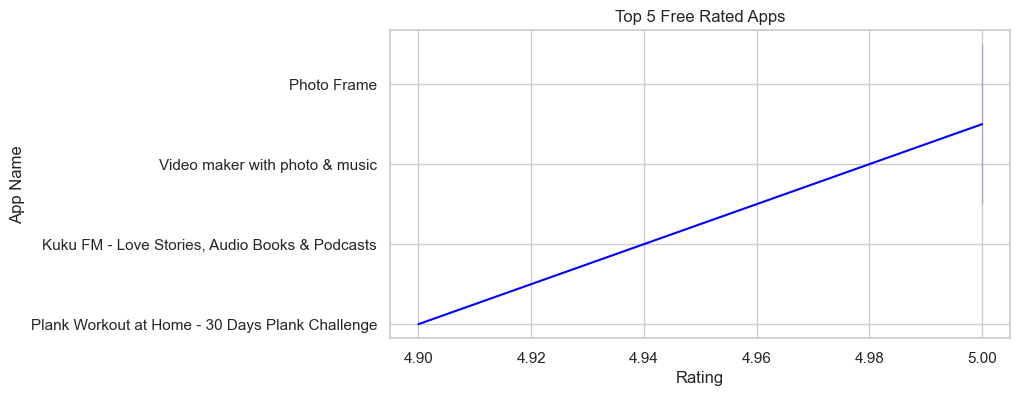

In [73]:
plt.figure(figsize=(8,4))
plt.xlabel("Rating")
sns.set_theme(style="whitegrid")
plt.title("Top 5 Free Rated Apps")
sns.lineplot(x = free_apps.values, y = free_apps.index,color = 'Blue')

Text(0.5, 1.0, 'Top 10 Max installations Category wise')

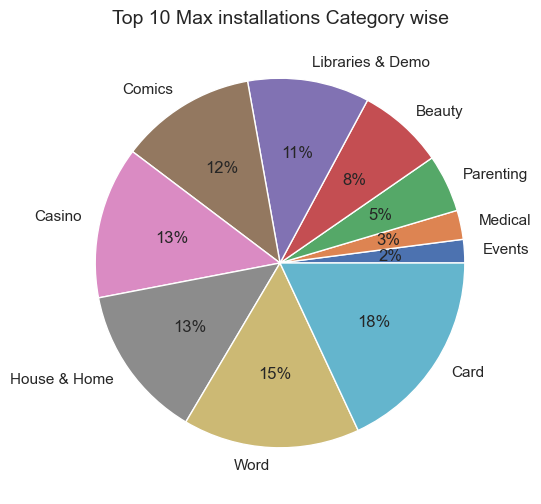

In [74]:
plt.figure(figsize=(8,6))
data = df.groupby('Category')['Maximum Installs'].max().sort_values(ascending = True)
data = data.head(10)
labels = data.keys()
plt.pie(data, labels= labels,autopct='%.0f%%') 
plt.title("Top 10 Max installations Category wise", fontsize=14)

Text(0.5, 1.0, 'Adults Installing apps in terms of category')

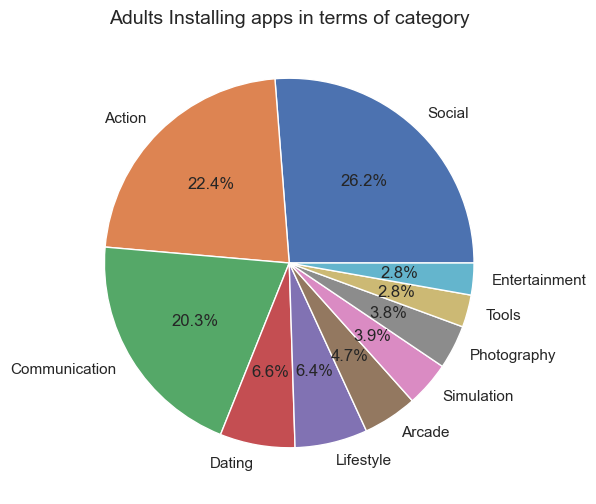

In [75]:
plt.figure(figsize=(8,6))
Adult = df[(df['Content Rating']=='Adults')]
Adult = Adult.groupby(['Category'])['Maximum Installs'].max().sort_values(ascending=False)
Adult = Adult.head(10)
labels = Adult.keys()
plt.pie(x = Adult, autopct="%.1f%%", labels=labels)
plt.title("Adults Installing apps in terms of category", fontsize=14)

Text(0.5, 1.0, 'Teen Installing apps in terms of category')

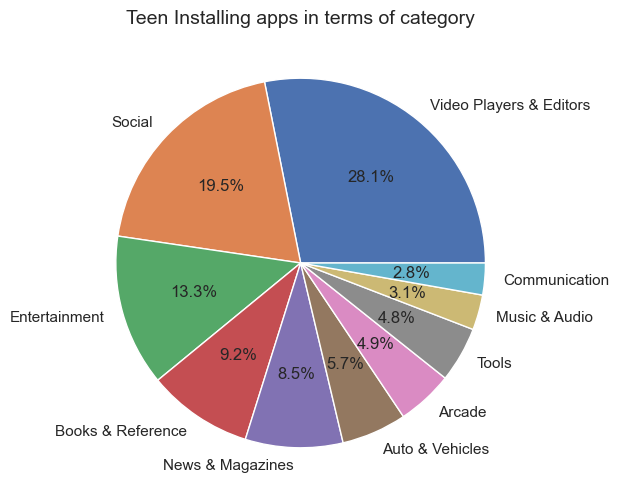

In [76]:
plt.figure(figsize=(8,6))
Teen = df[(df['Content Rating']=='Teen')]
Teen = Teen.groupby(['Category'])['Maximum Installs'].max().sort_values(ascending=False)
Teen = Teen.head(10)
labels = Teen.keys()
plt.pie(x = Teen, autopct="%.1f%%", labels=labels)
plt.title("Teen Installing apps in terms of category", fontsize=14)